## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

# [作業目標]
- 仿造範例的MAE函數, 自己寫一個MSE函數(參考上面公式)

# [作業重點]
- 注意程式的縮排
- 是否能將數學公式, 轉換為 Python 的函式組合? (In[2], Out[2])

In [11]:
# 載入基礎套件與代稱
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

# 定義 mean_squared_error 這個函數, 計算並傳回 MSE
def mean_squared_error(y, yp):
    err_arr = y - yp
#     print(err_arr)
    n = len(err_arr)
    for i in range(n):
        err_arr[i] = err_arr[i] ** 2
    mse = sum(err_arr) / n    
    return mse

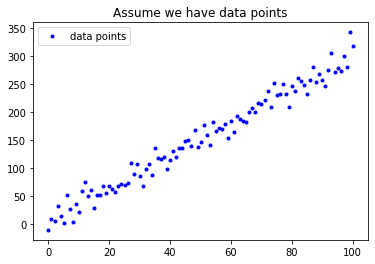

In [13]:
# 與範例相同, 不另外解說
w = 3
b = 0.5
x_lin = np.linspace(0, 100, 101)
y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

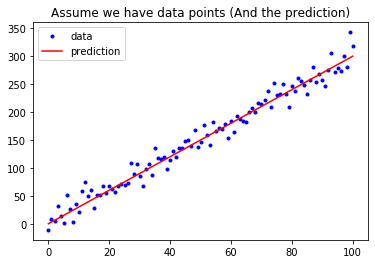

In [14]:
# 與範例相同, 不另外解說
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [15]:
# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 217.033
The Mean absolute error is 11.237


# [作業2]

請上 Kaggle, 在 Competitions 或 Dataset 中找一組競賽或資料並寫下：

1. 你選的這組資料為何重要
我選的是Bitcoin Historical Data，因為他有機會拿來研究Bitcoin的潛在pattern，或許有機會交易獲利。

2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)
資料提供者Zielak，看起來是位熱心的網友，應該也是從交易所的API慢慢蒐集資料的。
文中提到: "All effort has been made to deduplicate entries and verify the contents are correct and complete to the best of my ability, but obviously trust at your own risk" 作者也無法保證資料是100%正確的，且我相信他在處理資料的過程中肯定花了不少心思。

3. 蒐集而來的資料型態為何
基本上都是數值資料，第一行的Unix秒數需自行轉換成時間格式

4. 這組資料想解決的問題如何評估
這組資料當作迴歸問題來解或許是可行的，可以用MSE、RMSE、MAE來評估預測誤差?

# [作業3]

想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：

1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)
我想解的核心問題: 降低營業成本、提升營業效率(營收/成本 比值)

我假設: 每個地區、在不同時段，都會有明顯不同的客流量變化，這或許是可以去預估的
進而可以決定在什麼時段可以多派一些司機駐點，哪些時段能夠精簡人力


2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)
司機載客的時候應當都會登記時間戳記及載客數、乘客年齡、性別，該趟收入，或許能夠寫一個APP
將資料傳到後端資料庫進行儲存


3. 蒐集而來的資料型態為何
有數值，也有類別資料


4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)
首先我可以將每日的 營收/成本 的比值作紀錄
在與優化過後的排班分配所創造的 營收/成本 比值 做比對
可使用MSE、MAE、CE...等Metric